In [6]:
import statistics
import mariadb
#import mysql as mariadb
import pandas as pd
import matplotlib.pyplot as plt

def getParameters(): 

    # Connect to the Database
    mydb = mariadb.connect(
    host='xxxxx',
    user='xxxxx',
    password='xxxxx', 
    database='xxxxx'
    )
    mycursor = mydb.cursor()

    # Get parameters from EvoNAPS
    mycursor = mydb.cursor()
    query = "select a.FROM_DATABASE, a.SEQUENCES, a.COLUMNS, a.FRAC_WILDCARDS_GAPS, \
        b.TREE_LENGTH, b.TREE_DIAMETER, b.BL_MEAN, b.BL_VAR, \
            b.MODEL, b.ALPHA, b.PROP_INVAR, b.RATE_AC, b.RATE_AG, b.RATE_AT, b.RATE_CG, b.RATE_CT, b.RATE_GT, \
                b.STAT_FREQ_TYPE, b.STAT_FREQ_A, b.STAT_FREQ_C, b.STAT_FREQ_G, b.STAT_FREQ_T \
                    from dna_alignments a inner join dna_trees b using (ALI_ID) \
                        where b.ORIGINAL_ALI=1 and b.TREE_TYPE='ml';"
    mycursor.execute(query)
    myresult = mycursor.fetchall()
    my_df = pd.DataFrame(myresult, columns = ['FROM_DATABASE', 'SEQUENCES', 'COLUMNS', 'FRAC_WILDCARDS_GAPS','TREE_LENGTH', 'TREE_DIAMETER', 'BL_MEAN', 'BL_VAR', \
            'MODEL', 'ALPHA', 'PROP_INVAR', 'RATE_AC', 'RATE_AG', 'RATE_AT', 'RATE_CG', 'RATE_CT', 'RATE_GT', \
                'STAT_FREQ_TYPE', 'FREQ_A', 'FREQ_C', 'FREQ_G', 'FREQ_T'])

    return my_df

def get_tukeys_fences(lst, k=1.5):
    """
    Function was taken form: https://github.com/angtft/RAxMLGroveScripts/blob/main/org_script.py to make resulting plots comparable.
    By Alexis Stamatakis

    Computes the Tukey's fences for values in a given list and returns the low and high fences. Values below the lower
    fence and above the higher fence are considered to be outlier.
    @param lst: list with numerical values
    @param k: a nonnegative constant, usually 1.5
    @return: low fence, high fence
    """

    def is_float(value):
        try:
            c = float(value)
        except Exception as e:
            return False
        return True

    try:
        filtered_lst = sorted(float(v) for v in list(filter(lambda x: x != "None" and is_float(x), lst)))

        midpoint = int(round(len(filtered_lst) / 2.0))
        low_half_of_list = filtered_lst[:midpoint]
        high_half_of_list = filtered_lst[midpoint:]

        q1 = statistics.median(low_half_of_list)
        q3 = statistics.median(high_half_of_list)
        iqr = q3 - q1

        low_fence = q1 - k * iqr
        high_fence = q3 + k * iqr
    except Exception as e:
        raise e

    return low_fence, high_fence

def plotDistribution(df, para, name=None, freq=False): 

    # Only include non null values
    tmp_df = df[df[[para]].notna().all(axis=1)]
    # For freuqencies only include empirically estimated frequencies
    if freq is True: 
        tmp_df = tmp_df[tmp_df['STAT_FREQ_TYPE']=='empirical']

    # Get tukeys fences limits
    limits = get_tukeys_fences(tmp_df[para], k=1.5)
    limits = list(limits)

    # Exclude all values exceeding limits
    lst = tmp_df[tmp_df[para]<=limits[1]]
    lst = lst[lst[para]>=limits[0]][para]

    # Plot histogram
    plt.hist(lst, bins=100)
    plt.xlim(0, limits[1])
    if name: 
        plt.xlabel(name)
    else: 
        plt.xlabel(para)
    plt.ylabel('TREES')
    if freq is True: 
        plt.title('n='+str(len(lst))+' ('+str(round((len(lst)/len(tmp_df))*100,2))+'%), uniform frequencies were excluded')
    else: 
        plt.title('n='+str(len(lst))+' ('+str(round((len(lst)/len(tmp_df))*100,2))+'%)')
    # Save figures
    if name: 
        plt.savefig(name+'.png', format='png')
    else: 
        plt.savefig(para+'.png', format='png')
    plt.show()

In [4]:
par_df = getParameters()

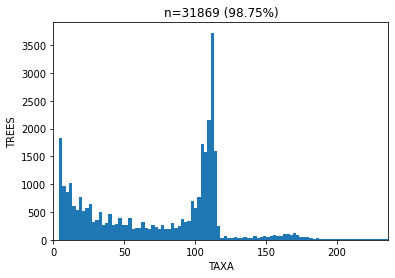

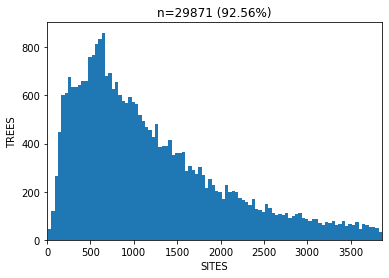

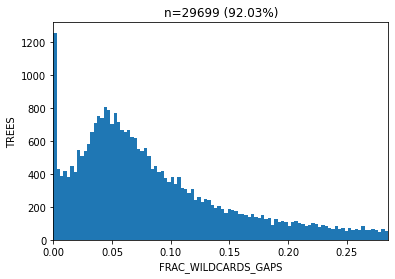

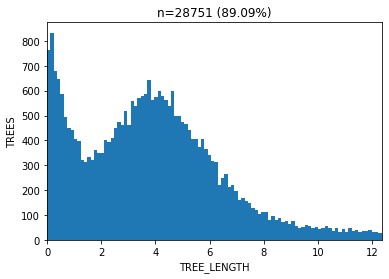

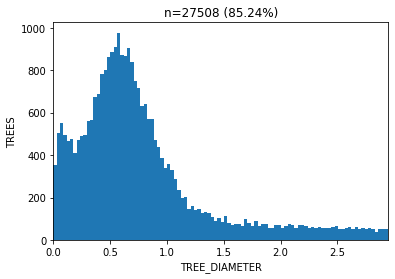

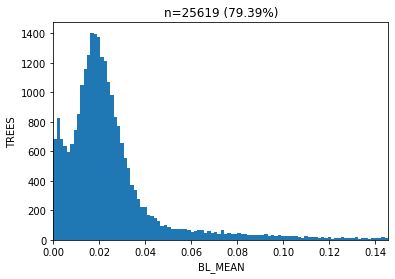

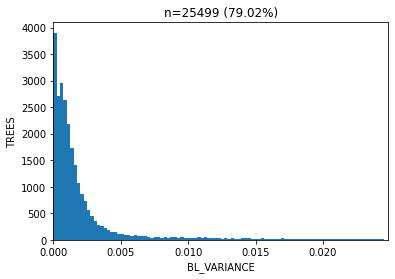

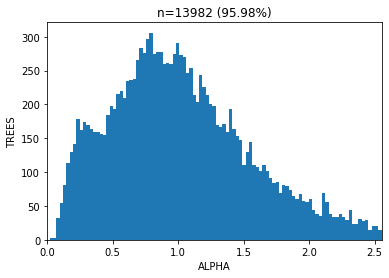

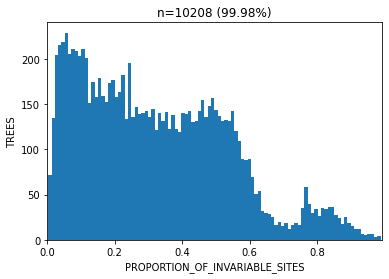

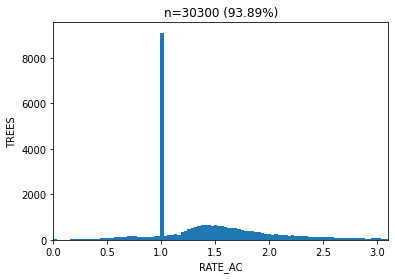

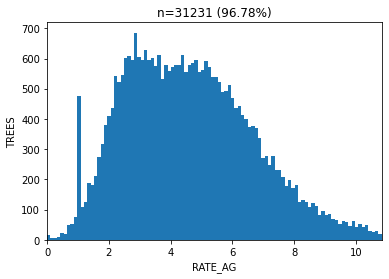

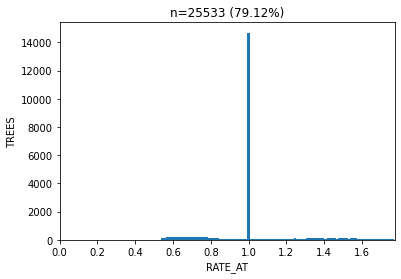

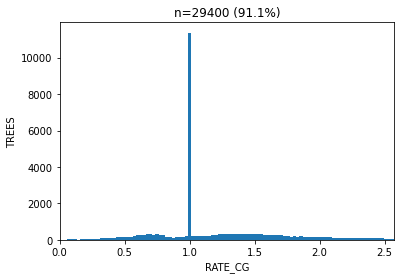

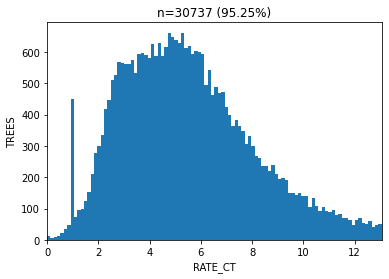

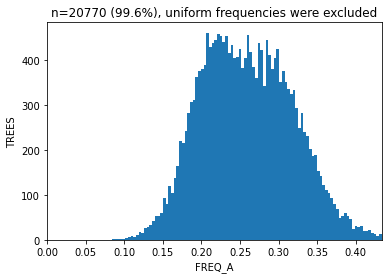

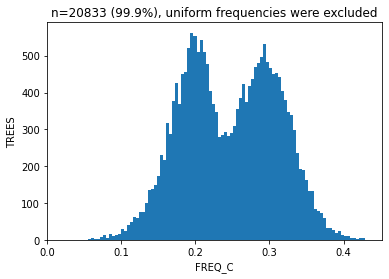

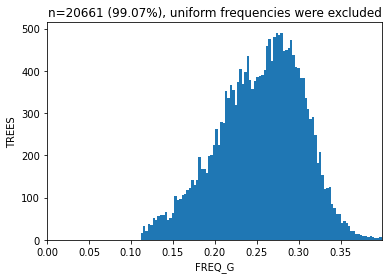

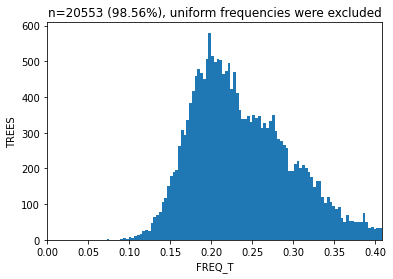

In [7]:
plotDistribution(par_df, 'SEQUENCES', name='TAXA')
plotDistribution(par_df, 'COLUMNS', name='SITES')
plotDistribution(par_df, 'FRAC_WILDCARDS_GAPS', name='FRAC_WILDCARDS_GAPS')
plotDistribution(par_df, 'TREE_LENGTH')
plotDistribution(par_df, 'TREE_DIAMETER')
plotDistribution(par_df, 'BL_MEAN')
plotDistribution(par_df, 'BL_VAR', name='BL_VARIANCE')
plotDistribution(par_df, 'ALPHA')
plotDistribution(par_df, 'PROP_INVAR', name='PROPORTION_OF_INVARIABLE_SITES')
plotDistribution(par_df, 'RATE_AC')
plotDistribution(par_df, 'RATE_AG')
plotDistribution(par_df, 'RATE_AT')
plotDistribution(par_df, 'RATE_CG')
plotDistribution(par_df, 'RATE_CT')
plotDistribution(par_df, 'FREQ_A', freq=True)
plotDistribution(par_df, 'FREQ_C', freq=True)
plotDistribution(par_df, 'FREQ_G', freq=True)
plotDistribution(par_df, 'FREQ_T', freq=True)